In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skzeros._AAA import AAA, poles_residues
from skzeros._domain import Rectangle

plt.style.use("style.mplstyle")

In [2]:
def f(z):
    return np.sin(np.sqrt(z**2 + 1)) - z


def f_prime(z):
    return z * np.cos(np.sqrt(z**2 + 1)) / np.sqrt(z**2 + 1) - 1


def F(z):
    return (np.sin(np.sqrt(z**2 + 1)) - z) * (-np.sin(np.sqrt(z**2 + 1)) - z)


def F_prime(z):
    return (-z - np.sin(np.sqrt(z**2 + 1))) * (
        z * np.cos(np.sqrt(z**2 + 1)) / np.sqrt(z**2 + 1) - 1
    ) + (-z + np.sin(np.sqrt(z**2 + 1))) * (
        -z * np.cos(np.sqrt(z**2 + 1)) / np.sqrt(z**2 + 1) - 1
    )

In [12]:
d = Rectangle(complex(-5, -5), complex(5, 5))
res1 = AAA(lambda z: f_prime(z) / f(z), d, max_iter=50, err_on_max_iter=False)
res2 = AAA(lambda z: F_prime(z) / F(z), d)
poles_1, residue_1 = poles_residues(*res1, residue=True)
poles_2, residue_2 = poles_residues(*res2, residue=True)

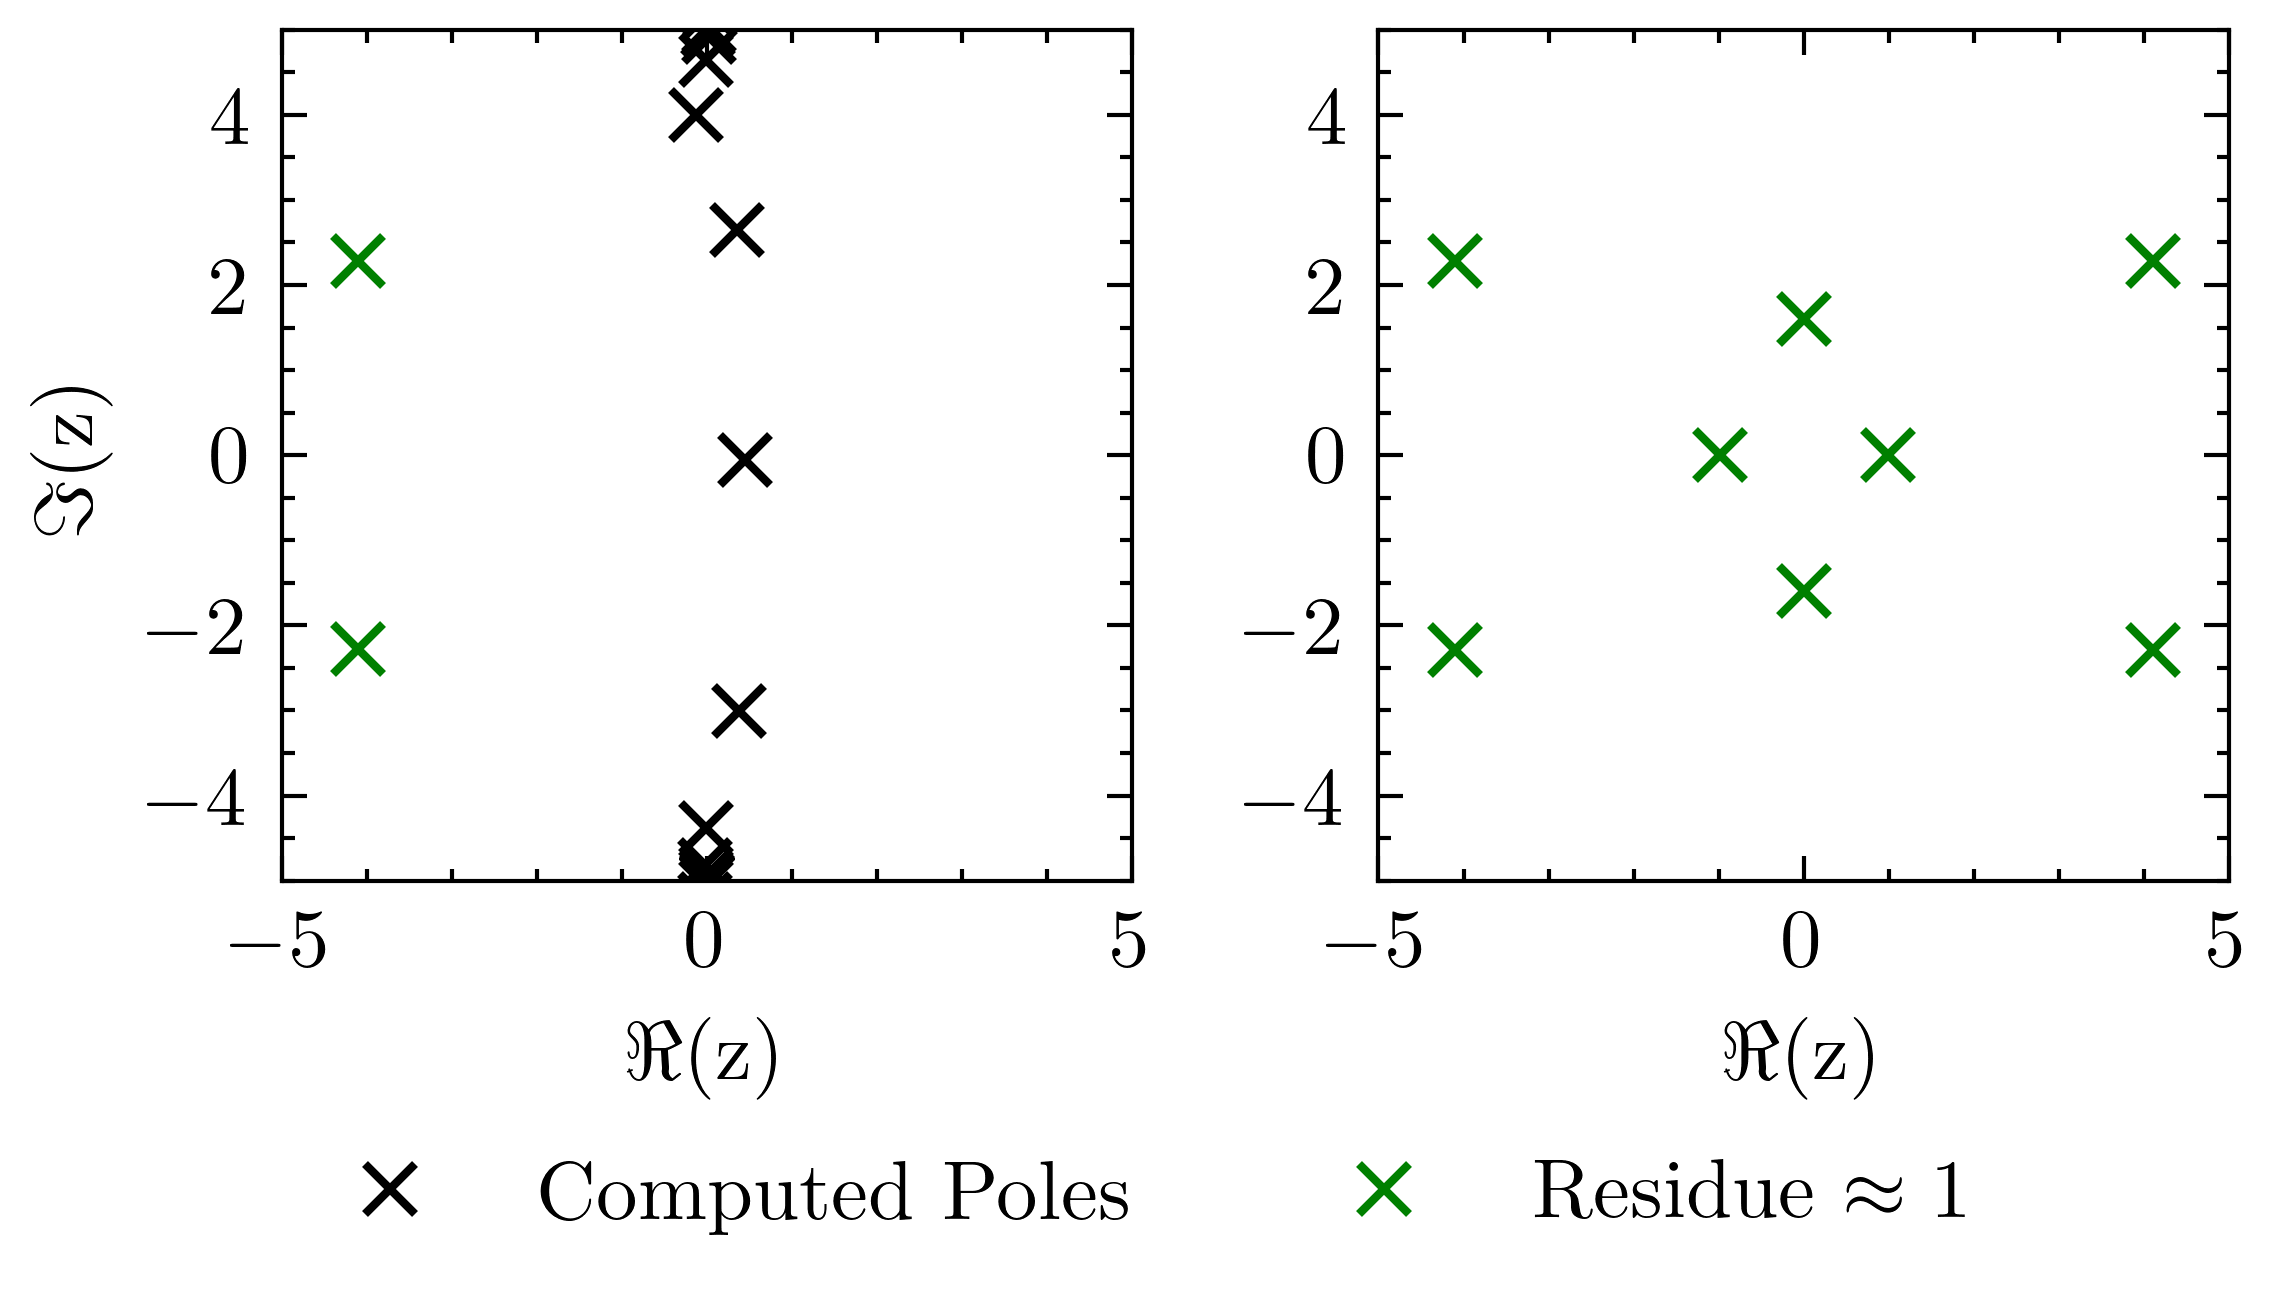

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(4, 3))
for ax in axs:
    ax.set(xlim=[-5, 5], ylim=[-5, 5], xlabel=r"$\Re$(z)")
    ax.set_aspect("equal", "box")
axs[0].set_ylabel(r"$\Im$(z)")
green = np.isclose(residue_1, 1, atol=1e-2, rtol=0)
axs[0].plot(poles_1.real[~green], poles_1.imag[~green], "x", label="Computed Poles")
axs[0].plot(
    poles_1.real[green], poles_1.imag[green], "xg", label=r"Residue $\approx 1$"
)
axs[1].plot(poles_2.real, poles_2.imag, "xg")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.15),
    ncol=2,
    fontsize=10,
)
plt.tight_layout()
plt.savefig("figures/branch_cut.pdf")